In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

c:\Users\tcornew\AppData\Local\anaconda3\Lib\site-packages\pandas\core\arrays\masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.5' currently installed).
  from pandas.core import (


## Train

In [3]:
EA_FP_df_2568 = pd.read_csv('EA - FP - 2568/logs.txt')
EA_FP_df_12345678 = pd.read_csv('EA - FP - 12345678/logs.txt')
EA_FP_df = pd.concat([EA_FP_df_2568, EA_FP_df_12345678])
EA_FP_df['algorithm'] = 'EA_FP'

EA_CHT_df_2568 = pd.read_csv('EA - CHT - 2568/logs.txt')
EA_CHT_df_12345678 = pd.read_csv('EA - CHT - 12345678/logs.txt')
EA_CHT_df = pd.concat([EA_CHT_df_2568, EA_CHT_df_12345678])
EA_CHT_df['algorithm'] = 'EA_CHT'

df_train = pd.concat([EA_FP_df, EA_CHT_df])
df_train.rename(columns={'set of enemies  ': 'training group'}, inplace=True)
df_train.rename(columns={'champ.fitness': 'max fitness'}, inplace=True)
df_train.rename(columns={'train_mean.fitness': 'mean fitness'}, inplace=True)

## Test

In [4]:
EA_FP_df_2568_results = pd.read_csv('EA - FP - 2568/test_results.txt')
EA_FP_df_12345678_results = pd.read_csv('EA - FP - 12345678/test_results.txt')

EA_FP_df_2568_results['training group'] = '2 5 6 8'
EA_FP_df_12345678_results['training group'] = '1 2 3 4 5 6 7 8'

EA_FP_df_results = pd.concat([EA_FP_df_2568_results, EA_FP_df_12345678_results])


EA_CHT_df_2568_results = pd.read_csv('EA - CHT - 2568/test_results.txt')
EA_CHT_df_12345678_results = pd.read_csv('EA - CHT - 12345678/test_results.txt')
EA_CHT_df_2568_results['training group'] = '2 5 6 8'
EA_CHT_df_12345678_results['training group'] = '1 2 3 4 5 6 7 8'

EA_CHT_df_results = pd.concat([EA_CHT_df_2568_results, EA_CHT_df_12345678_results])


EA_CHT_df_results['algorithm'] = 'EA_CHT'
EA_FP_df_results['algorithm'] = 'EA_FP'

df_test = pd.concat([EA_FP_df_results, EA_CHT_df_results])

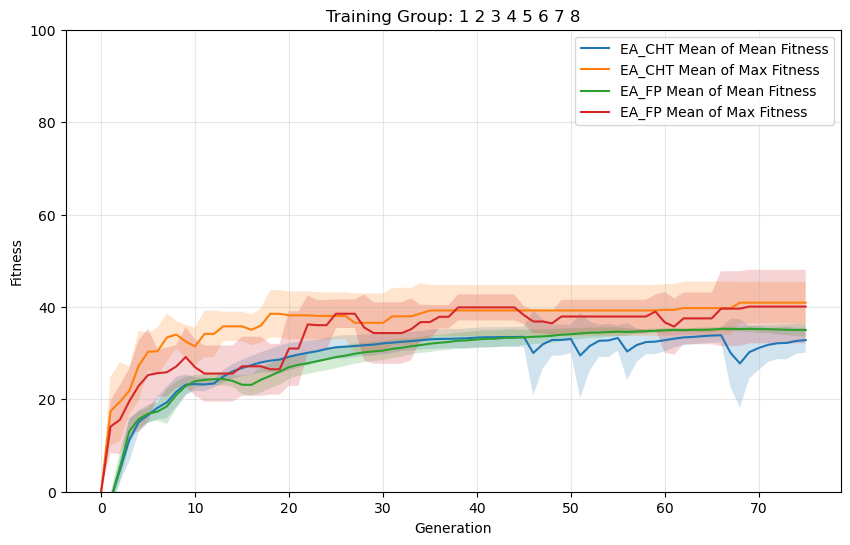

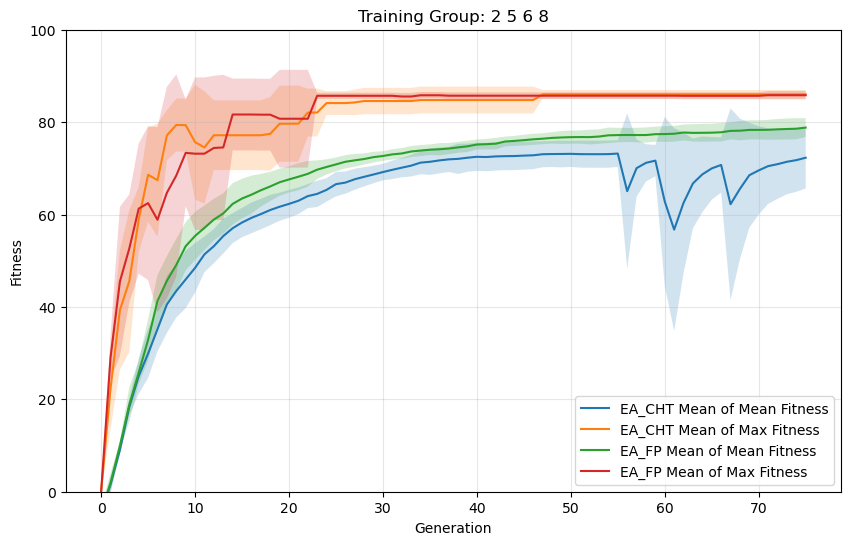

In [5]:
# First, calculate the averages over 'run id' for 'mean fitness' and 'max fitness'
grouped_run_df = df_train.groupby(['training group', 'algorithm', 'gen', 'run id']).agg(
    mean_fitness=('mean fitness', 'mean'),
    max_fitness=('max fitness', 'mean')
).reset_index()

# Now group by 'training group', 'algorithm', and 'gen' to calculate the overall mean and std dev across runs
grouped_df = grouped_run_df.groupby(['training group', 'gen', 'algorithm']).agg(
    mean_of_mean_fitness=('mean_fitness', 'mean'),
    mean_of_max_fitness=('max_fitness', 'mean'),
    std_of_mean_fitness=('mean_fitness', 'std'),
    std_of_max_fitness=('max_fitness', 'std')
).reset_index()

# Plot for each training group, with lines for each algorithm
for training_group in grouped_df['training group'].unique():
    plt.figure(figsize=(10, 6))
    
    subset = grouped_df[grouped_df['training group'] == training_group]
    
    # For each algorithm in the training group, plot both mean and max fitness
    for algorithm in subset['algorithm'].unique():
        algo_subset = subset[subset['algorithm'] == algorithm]
        
        # Plot the mean of mean fitness
        plt.plot(algo_subset['gen'], algo_subset['mean_of_mean_fitness'], label=f'{algorithm} Mean of Mean Fitness')
        
        # Plot the mean of max fitness
        plt.plot(algo_subset['gen'], algo_subset['mean_of_max_fitness'], label=f'{algorithm} Mean of Max Fitness')
        
        # Optionally, plot the standard deviation as shaded area for mean fitness
        plt.fill_between(algo_subset['gen'],
                         algo_subset['mean_of_mean_fitness'] - algo_subset['std_of_mean_fitness'],
                         algo_subset['mean_of_mean_fitness'] + algo_subset['std_of_mean_fitness'], 
                         alpha=0.2)
        
        # Optionally, plot the standard deviation as shaded area for max fitness
        plt.fill_between(algo_subset['gen'],
                         algo_subset['mean_of_max_fitness'] - algo_subset['std_of_max_fitness'],
                         algo_subset['mean_of_max_fitness'] + algo_subset['std_of_max_fitness'], 
                         alpha=0.2)

    plt.title(f'Training Group: {training_group}')
    plt.xlabel('Generation')
    plt.ylabel('Fitness')
    plt.ylim(0, 100)
    plt.legend()
    plt.grid(alpha=0.3)
    plt.show()


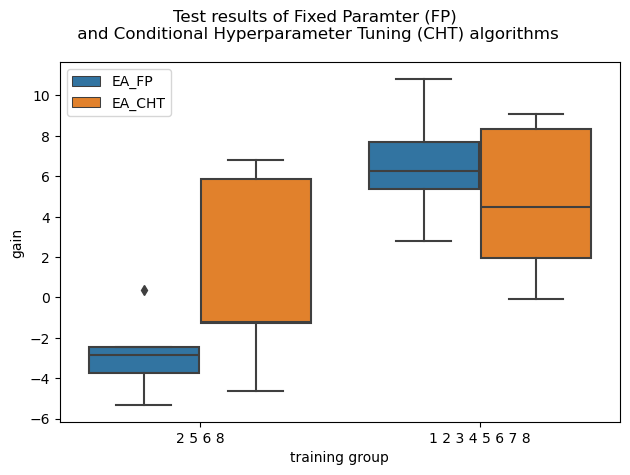

Training Group: 2 5 6 8
t-statistic: -1.618, p-value: 0.144
--------------------------------------------------
Training Group: 1 2 3 4 5 6 7 8
t-statistic: 0.832, p-value: 0.430
--------------------------------------------------


In [65]:
from scipy import stats

sns.boxplot(df_test, x='training group', y= "gain", hue='algorithm')
plt.suptitle('Test results of Fixed Paramter (FP)\n and Conditional Hyperparameter Tuning (CHT) algorithms')
plt.legend(loc = 'upper left')
plt.tight_layout()
plt.show()

# Perform t-tests to compare the gains between the two algorithms for each training group
training_groups = df_test['training group'].unique()

for training_group in training_groups:
    # Separate gains by algorithm
    fp_gains = df_test[(df_test['training group'] == training_group) & (df_test['algorithm'] == 'EA_FP')]['gain']
    cht_gains = df_test[(df_test['training group'] == training_group) & (df_test['algorithm'] == 'EA_CHT')]['gain']
    
    # Perform an independent t-test (assuming normal distribution)
    t_stat, p_value = stats.ttest_ind(fp_gains, cht_gains)
    
    # Output the results
    print(f"Training Group: {training_group}")
    print(f"t-statistic: {t_stat:.3f}, p-value: {p_value:.3f}")
    print("-" * 50)

In [66]:
# BEST SOLUTION
# EA - FP - 12345678
# run id: 31:06